In [1]:
import pandas as pd

df = pd.read_csv("datasets/netflix_titles_2019.csv")
df_imdb = pd.read_pickle("imdb_2019.pkl")

# First 10 rows of the 2019 Netflix dataset

In [2]:
df.head(10)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show
5,81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,"November 29, 2019",2018,TV-14,107 min,"Comedies, International Movies, Thrillers",Nollywood star Ramsey Nouah learns that someon...,Movie
6,81120982,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,"November 29, 2019",2019,TV-MA,81 min,"Dramas, Independent Movies, International Movies","Romance, mystery and adventure intertwine as a...",Movie
7,81227195,Kalushi: The Story of Solomon Mahlangu,Mandla Dube,"Thabo Rametsi, Thabo Malema, Welile Nzuza, Jaf...",South Africa,"November 29, 2019",2016,TV-MA,107 min,"Dramas, International Movies",The life and times of iconic South African lib...,Movie
8,70205672,La Reina del Sur,NaN,"Kate del Castillo, Cristina Urgel, Alberto Jim...","United States, Spain, Colombia, Mexico",NaN,2019,TV-14,2 Seasons,"Crime TV Shows, International TV Shows, Spanis...",This compelling show tells the story of the le...,TV Show
9,81172841,Lagos Real Fake Life,Mike Ezuruonye,"Nonso Diobi, Mike Ezuruonye, Mercy Aigbe, Rex ...",NaN,"November 29, 2019",2018,TV-14,118 min,"Comedies, International Movies",Two mooching friends vie for the attention of ...,Movie


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# How much of the content is made from movies and tv shows?
## The following pie chart is refering to the whole content available in the US

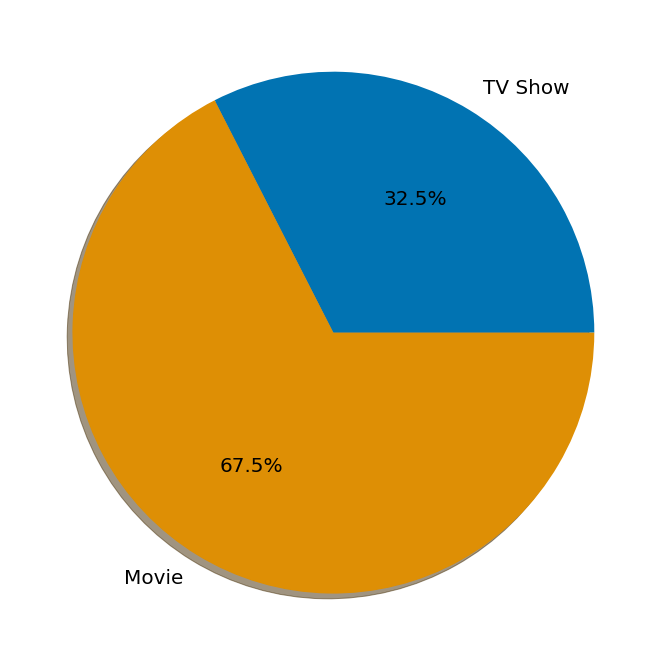

In [5]:
colors = sns.color_palette('colorblind')

content_type = Counter(df['type'])

plt.figure(figsize=(12, 12))
plt.pie(x = [_ for _ in content_type.values()], labels = content_type.keys(), colors = colors, autopct='%1.1f%%', shadow=True, textprops={'fontsize': 20})

plt.show()

### The following function makes it possible to retrieve data on how much of the content from a given *country* has a specific *attribute* and *type*

In [6]:
def attr_finder(attribute, country, type):
    df["from"] = df["country"].fillna("").apply(lambda x: 1 if country.lower() in x.lower() else 0)
    small_df = df[df["from"] == 1]
    if type.lower() == "movie":
        small_df = small_df[small_df['type'] == "Movie"]
    elif type.lower() == "tv show":
        small_df = small_df[small_df['type'] == "TV Show"]
    else:
        small_df = small_df
    filter = ", ".join(small_df[attribute].fillna("")).split(", ")
    results = Counter(filter).most_common(11)
    labels = [att[0] for att in results if att[0] != ""]
    values = [att[1] for att in results if att[0] != ""]
               
    return labels[:10], values[:10]

## Which content categories are the most numerous?

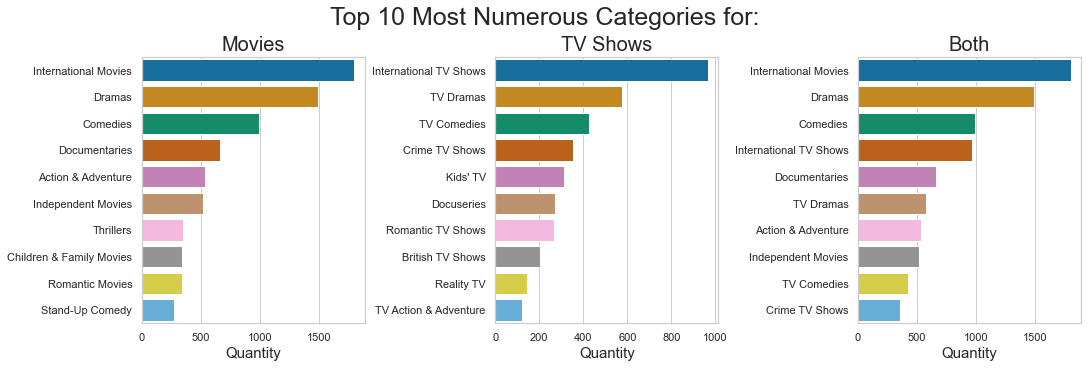

In [7]:
content_type = ["Movie", "TV Show", "all"]
graphs = []
for content in content_type:
    graphs.append(attr_finder("listed_in", "", content))

sns.set_theme(style="whitegrid", palette = "colorblind")

fig, axes = plt.subplots(1, 3, figsize=(15,5), constrained_layout = True)
fig.suptitle('Top 10 Most Numerous Categories for:', fontsize = 25)

sns.barplot(ax=axes[0], y=graphs[0][0], x=graphs[0][1]).set_xlabel("Quantity", fontsize = 15)
axes[0].set_title("Movies", fontsize = 20)
sns.barplot(ax=axes[1], y=graphs[1][0], x=graphs[1][1]).set_xlabel("Quantity", fontsize = 15)
axes[1].set_title("TV Shows", fontsize = 20)
sns.barplot(ax=axes[2], y=graphs[2][0], x=graphs[2][1]).set_xlabel("Quantity", fontsize = 15)
axes[2].set_title("Both", fontsize = 20)

plt.show()

## Which countries provide the most content?

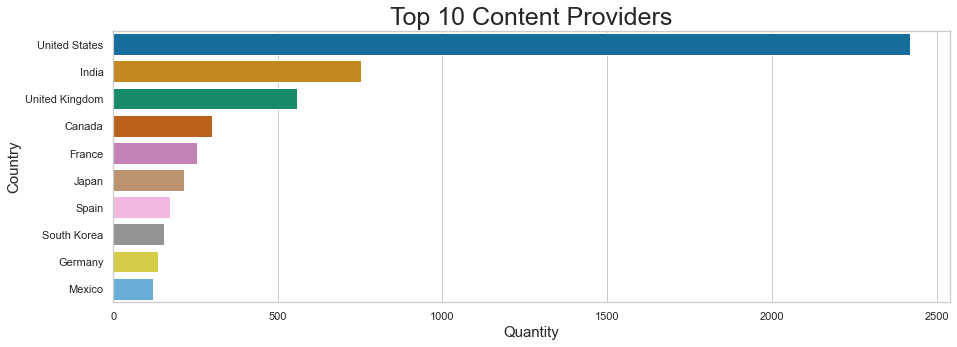

In [8]:
data = attr_finder("country", "", "")

sns.set_theme(style="whitegrid", palette = "colorblind", rc = {'figure.figsize':(15,5)})

graph = sns.barplot(y=data[0], x=data[1])
graph.set_xlabel("Quantity", fontsize = 15)
graph.set_ylabel("Country", fontsize = 15)
graph.set_title("Top 10 Content Providers", fontsize = 25)

plt.show()

## The distribution of content categories for top 4 providing countries and Poland

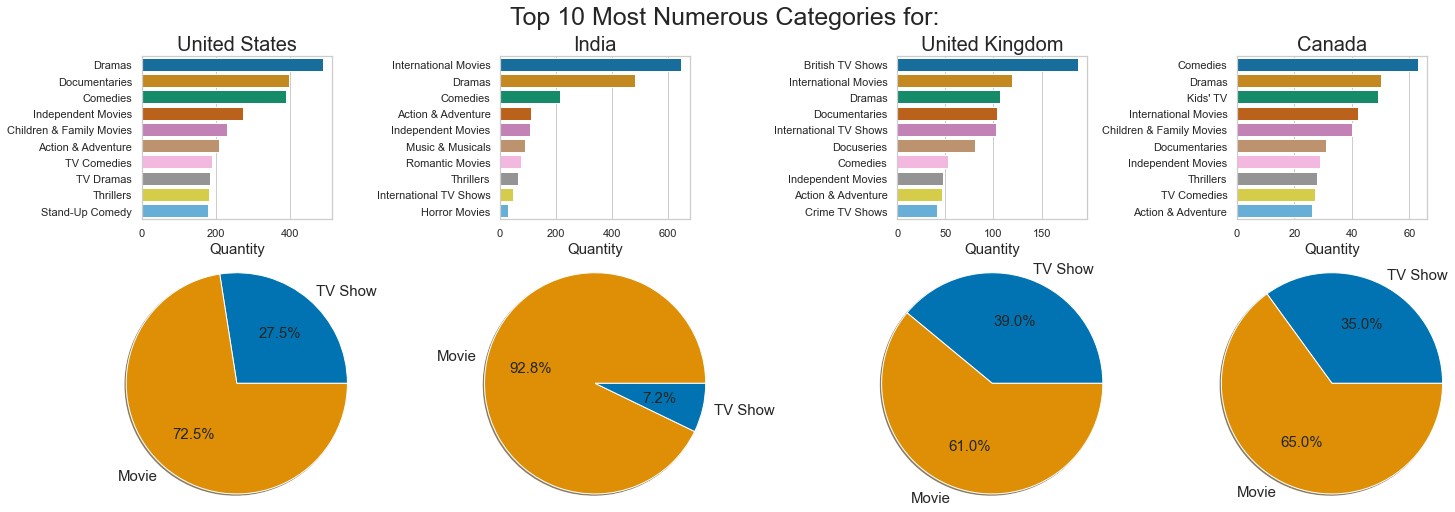

In [9]:
countries = data[0][:4]
content_cat = []
type_perc = []

for country in countries:
    content_cat.append(attr_finder("listed_in", country, "all"))
    df["from"] = df["country"].fillna("").apply(lambda x: 1 if country.lower() in x.lower() else 0)
    small_df = df[df["from"] == 1]
    type_perc.append(Counter(small_df['type']))

sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(2, 4, figsize=(20,7), constrained_layout = True)
fig.suptitle('Top 10 Most Numerous Categories for:', fontsize = 25)

for i in range(4):
    sns.barplot(ax=axes[0,i], y=content_cat[i][0], x=content_cat[i][1], palette = 'colorblind').set_xlabel("Quantity", fontsize = 15)
    axes[0,i].set_title(countries[i], fontsize = 20)
    
for i in [0,2,3]:
    plt.subplot2grid((2,4),(1,i))
    plt.pie(x = [_ for _ in type_perc[i].values()], labels = type_perc[i].keys(), colors = ["#0173B2", "#DE8F05"], autopct='%1.1f%%', shadow=True, textprops={'fontsize': 15}, radius = 1.7)

plt.subplot2grid((2,4),(1,1))
plt.pie(x = [_ for _ in type_perc[1].values()], labels = type_perc[1].keys(), colors = ["#DE8F05", "#0173B2"], autopct='%1.1f%%', shadow=True, textprops={'fontsize': 15}, radius = 1.7)
    
plt.show()

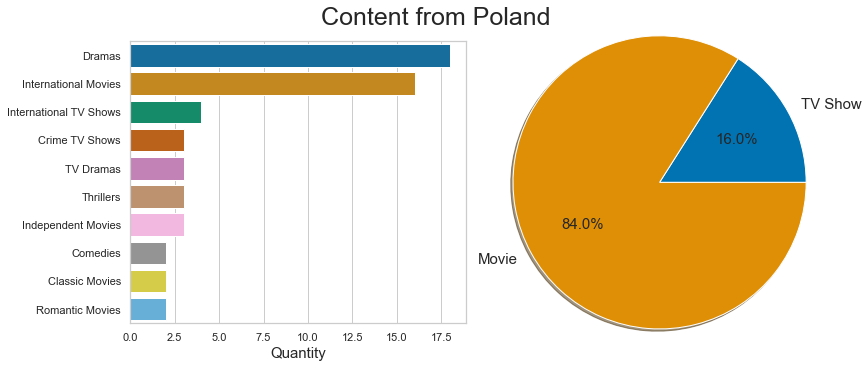

In [10]:
content_cat = []
type_perc = []

country = 'poland'
content_cat.append(attr_finder("listed_in", country, "all"))
df["from"] = df["country"].fillna("").apply(lambda x: 1 if country.lower() in x.lower() else 0)
small_df = df[df["from"] == 1]
type_perc.append(Counter(small_df['type']))

sns.set_theme(style="whitegrid", palette = "colorblind")

fig, axes = plt.subplots(1, 2, figsize=(12,5), constrained_layout = True)
fig.suptitle('Content from Poland', fontsize = 25)

sns.barplot(ax=axes[0], y=content_cat[0][0], x=content_cat[0][1]).set_xlabel("Quantity", fontsize = 15)
    
axes[1] = plt.pie(x = [_ for _ in type_perc[0].values()], labels = type_perc[0].keys(), colors = ["#0173B2", "#DE8F05"], autopct='%1.1f%%', shadow=True, textprops={'fontsize': 15}, radius = 1.3)

plt.show()

## Which actors have the most content from top 4 providers and Poland?

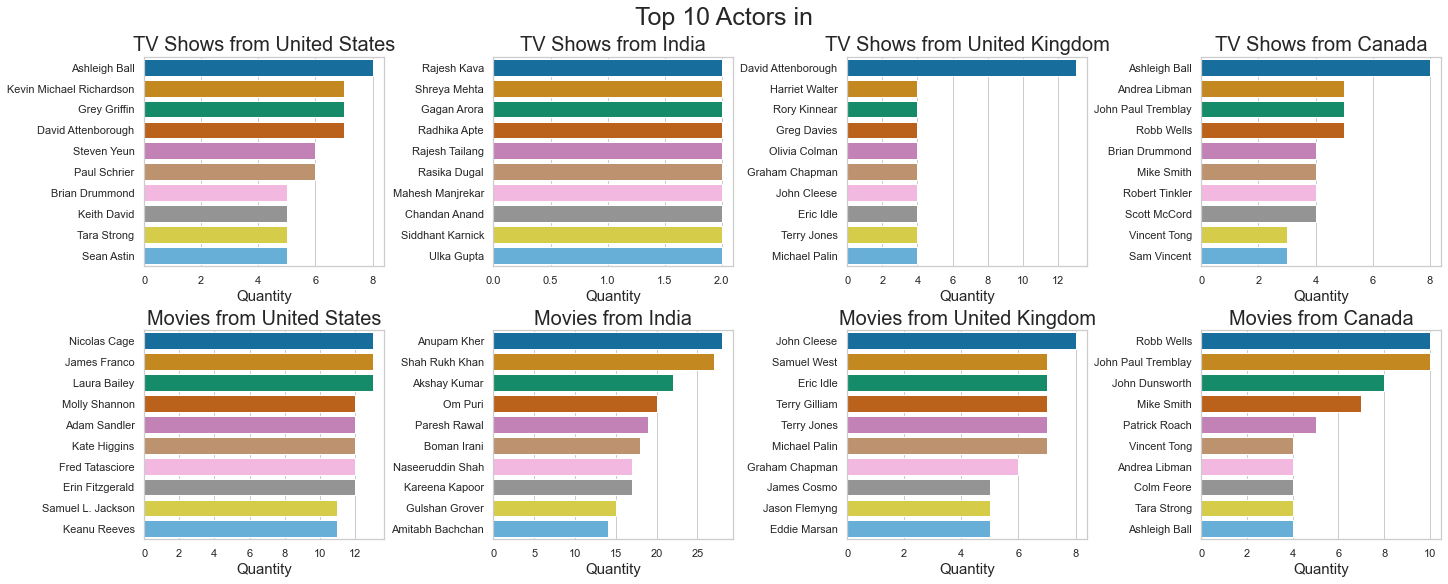

In [11]:
countries = data[0][:4]
actors_tv = []
actors_movie = []

for country in countries:
    actors_tv.append(attr_finder("cast", country, "TV Show"))
    actors_movie.append(attr_finder("cast", country, "Movie"))

sns.set_theme(style="whitegrid", palette = "colorblind")

fig, axes = plt.subplots(2, 4, figsize=(20,8), constrained_layout = True)
fig.suptitle('Top 10 Actors in', fontsize = 25)

for i in range(4):
    sns.barplot(ax=axes[0,i], y=actors_tv[i][0], x=actors_tv[i][1]).set_xlabel("Quantity", fontsize = 15)
    axes[0,i].set_title("TV Shows from " + countries[i], fontsize = 20)
    sns.barplot(ax=axes[1,i], y=actors_movie[i][0], x=actors_movie[i][1]).set_xlabel("Quantity", fontsize = 15)
    axes[1,i].set_title("Movies from " + countries[i], fontsize = 20)
    
plt.show()

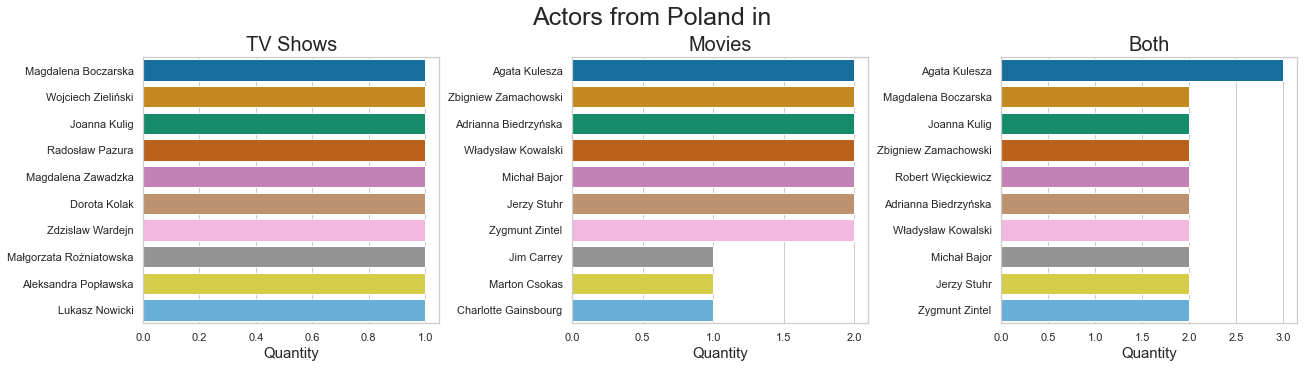

In [12]:
poland_tv = [attr_finder("cast", 'poland', "TV Show")]
poland_movie = [attr_finder("cast", "poland", "Movie")]
poland_all = [attr_finder("cast", "poland", "")]

df["from"] = df["country"].fillna("").apply(lambda x: 1 if "poland" in x.lower() else 0)
small_df = df[df["from"] == 1]

sns.set_theme(style="whitegrid", palette = "colorblind")

fig, axes = plt.subplots(1, 3, figsize=(18,5), constrained_layout = True)
fig.suptitle('Actors from Poland in', fontsize = 25)

sns.barplot(ax=axes[0], y=poland_tv[0][0], x=poland_tv[0][1]).set_xlabel("Quantity", fontsize = 15)
sns.barplot(ax=axes[1], y=poland_movie[0][0], x=poland_movie[0][1]).set_xlabel("Quantity", fontsize = 15)
sns.barplot(ax=axes[2], y=poland_all[0][0], x=poland_all[0][1]).set_xlabel("Quantity", fontsize = 15)
axes[0].set_title("TV Shows", fontsize = 20)
axes[1].set_title("Movies", fontsize = 20)
axes[2].set_title("Both", fontsize = 20)
    
plt.show()

## Top 10 Movie and TV Show directors from top 4 providers and Poland

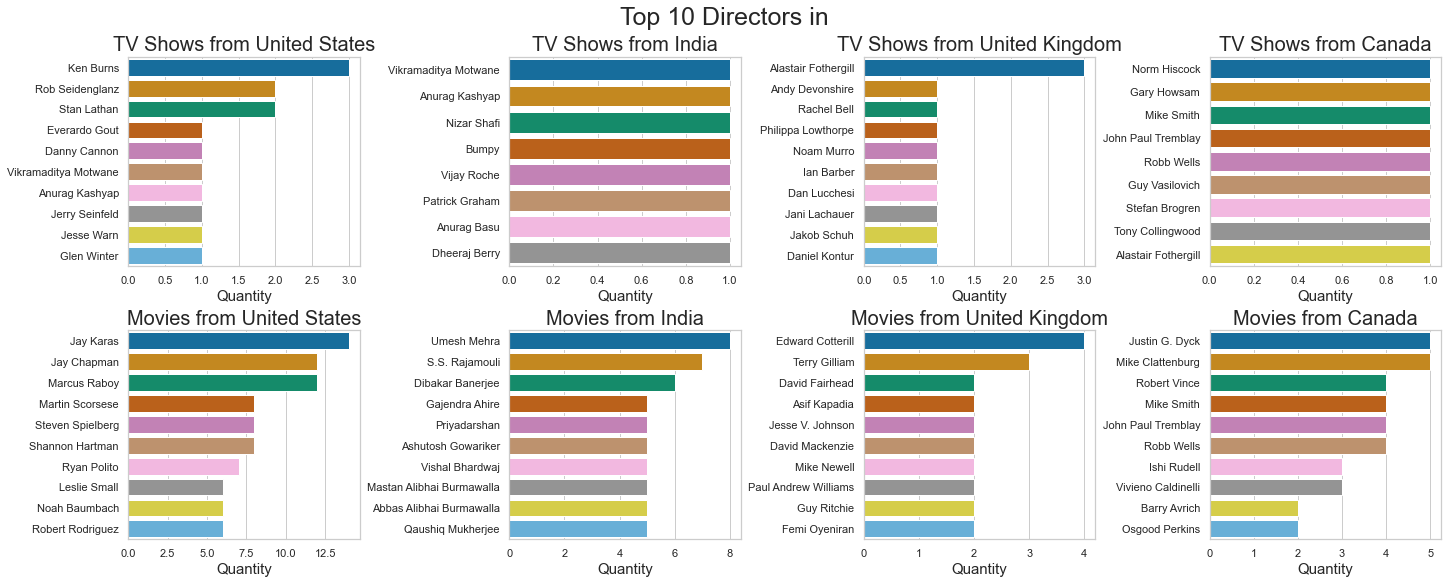

In [13]:
countries = data[0][:4]
director_tv = []
director_movie = []

for country in countries:
    director_tv.append(attr_finder("director", country, "TV Show"))
    director_movie.append(attr_finder("director", country, "Movie"))

sns.set_theme(style="whitegrid", palette = "colorblind")

fig, axes = plt.subplots(2, 4, figsize=(20,8), constrained_layout = True)
fig.suptitle('Top 10 Directors in', fontsize = 25)

for i in range(4):
    sns.barplot(ax=axes[0,i], y=director_tv[i][0], x=director_tv[i][1]).set_xlabel("Quantity", fontsize = 15)
    axes[0,i].set_title("TV Shows from " + countries[i], fontsize = 20)
    sns.barplot(ax=axes[1,i], y=director_movie[i][0], x=director_movie[i][1]).set_xlabel("Quantity", fontsize = 15)
    axes[1,i].set_title("Movies from " + countries[i], fontsize = 20)
    
plt.show()

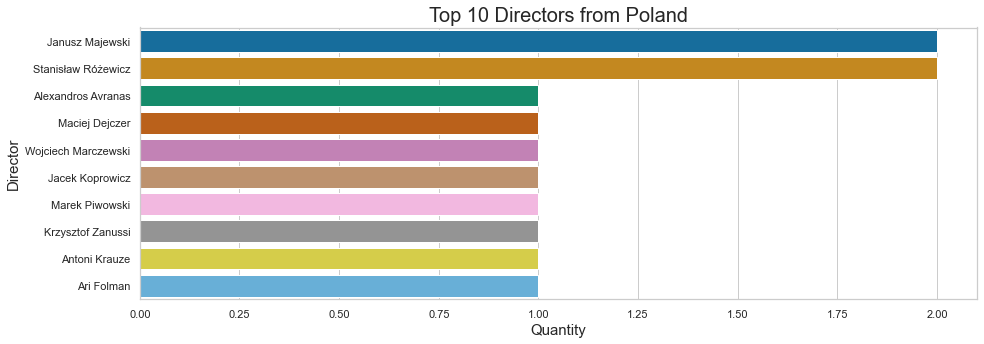

In [14]:
poland_all = [attr_finder("director", "poland", "")]

df["from"] = df["country"].fillna("").apply(lambda x: 1 if "poland" in x.lower() else 0)
small_df = df[df["from"] == 1]

sns.set_theme(style="whitegrid", palette = "colorblind", rc = {'figure.figsize':(15,5)})

fig = sns.barplot(y=poland_all[0][0], x=poland_all[0][1])
fig.set_xlabel("Quantity", fontsize = 15)
fig.set_ylabel("Director", fontsize = 15)
fig.set_title("Top 10 Directors from Poland", fontsize = 20)
    
plt.show()

## Did movie or tv show duration change across years?

In [15]:
df["duration"] = df["duration"].fillna("").apply(lambda x: x.split()[0])

content_duration = df.groupby(['release_year', 'type']).agg({'duration' : ['count', 'min', 'max', 'median', 'std']})
content_duration.columns = ["_".join(x) for x in content_duration.columns.ravel()]
content_duration = content_duration.round(1)
content_duration

C:\Users\marty\AppData\Local\Temp\ipykernel_9580\2489701857.py:4: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  content_duration.columns = ["_".join(x) for x in content_duration.columns.ravel()]


duration_count duration_min duration_max  \
release_year type                                                
1925         TV Show               1            1            1   
1942         Movie                 2           18           52   
1943         Movie                 3           45           82   
1944         Movie                 3           40           76   
1945         Movie                 3           32           63   
...                              ...          ...          ...   
2018         Movie               630          100           99   
             TV Show             410            1            9   
2019         Movie               347           10           99   
             TV Show             415            1            8   
2020         TV Show               1            1            1   

                      duration_median  duration_std  
release_year type                                    
1925         TV Show              1.0           NaN  
1942         Movie               35.0          24.0  
1943         Movie               61.0          18.6  
1944         Movie               40.0          20.8  
1945         Movie               59.0          16.9  
...                               ...           ...  
2018         Movie               95.0          27.1  
             TV Show              1.0           1.7  
2019         Movie               92.0          29.3  
             TV Show              1.0           1.6  
2020         TV Show              1.0           NaN  

[113 rows x 5 columns]

In [16]:
data_tv = df[df['type'] == 'TV Show'].groupby('release_year').agg({'duration' : ['count', 'median']})
data_tv.columns = data_tv.columns.get_level_values(1)
data_tv.reset_index(inplace=True)

data_movie = df[df['type'] == 'Movie'].groupby('release_year').agg({'duration' : ['count', 'median']})
data_movie.columns = data_movie.columns.get_level_values(1)
data_movie.reset_index(inplace=True)


In [17]:
df['duration'] = df['duration'].astype(int)

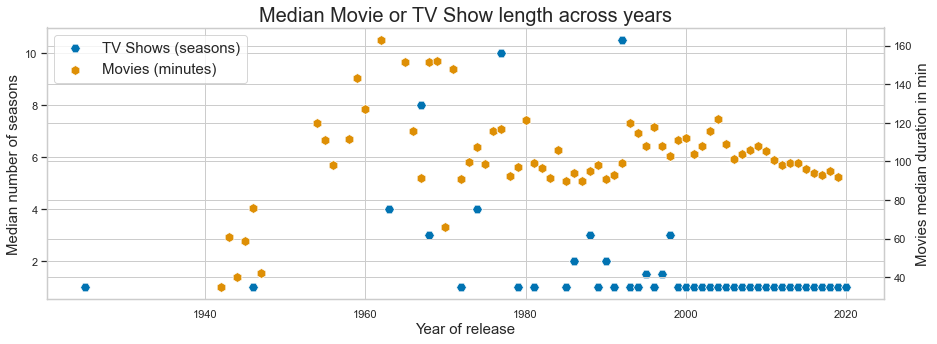

In [18]:
fig = plt.figure()
sns.set_theme(style="whitegrid", rc = {'figure.figsize':(15,5)})

ax1 = sns.scatterplot(data = data_tv, x = 'release_year', y = 'median', color = "#0173B2", label = 'TV Shows (seasons)', s = 100, marker = 'H')
ax1.set_ylabel("Median number of seasons", fontsize = 15)
ax1.set_xlabel("Year of release", fontsize = 15)
ax1.set_title("Median Movie or TV Show length across years", fontsize = 20)
ax2 = plt.twinx()
sns.scatterplot(data = data_movie, x = 'release_year', y = 'median', color = "#DE8F05", label = "Movies (minutes)", s = 100, marker = 'h', ax=ax2)
ax2.set_ylabel("Movies median duration in min", fontsize = 15)
ax1.legend_.remove()
ax2.legend_.remove()

fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes, fontsize = 15)
plt.show()

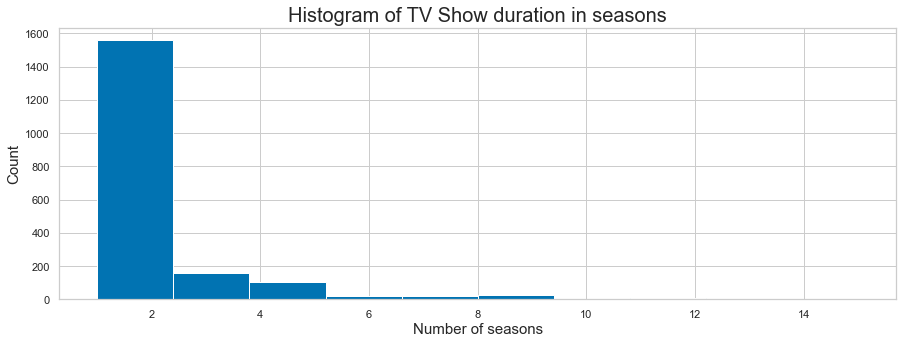

In [19]:
sns.set_theme(style="whitegrid", palette = "colorblind", rc = {'figure.figsize':(15,5)})
g = df[df['type'] == 'TV Show']['duration'].hist()
g.set_xlabel("Number of seasons", fontsize = 15)
g.set_ylabel("Count", fontsize = 15)
g.set_title("Histogram of TV Show duration in seasons", fontsize = 20)
plt.show()

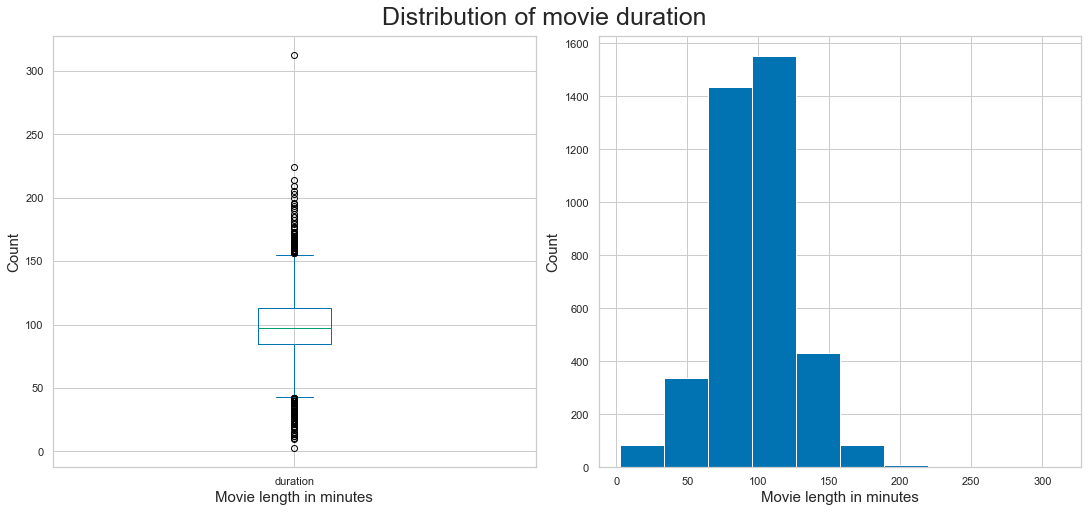

In [20]:
sns.set_theme(style="whitegrid", palette = "colorblind", rc = {'figure.figsize':(10,10)})
fig, axes = plt.subplots(1, 2, figsize=(15,7), constrained_layout = True)
fig.suptitle('Distribution of movie duration', fontsize = 25)

ax1 = df[df['type'] == 'Movie']['duration'].plot(kind='box', ax = axes[0])
ax1.set_xlabel("Movie length in minutes", fontsize = 15)
ax1.set_ylabel("Count", fontsize = 15)

ax2 = df[df['type'] == 'Movie']['duration'].plot(kind='hist', ax = axes[1])
ax2.set_xlabel("Movie length in minutes", fontsize = 15)
ax2.set_ylabel("Count", fontsize = 15)

plt.show()

## What is the distribution of the content rating?

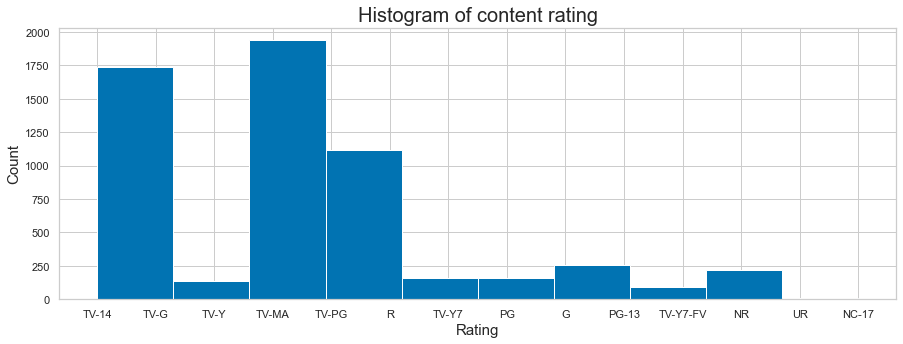

In [21]:
sns.set_theme(style="whitegrid", palette = "colorblind", rc = {'figure.figsize':(15,5)})
g = df['rating'].hist()
g.set_xlabel("Rating", fontsize = 15)
g.set_ylabel("Count", fontsize = 15)
g.set_title("Histogram of content rating", fontsize = 20)
plt.show()

## How much of the available content comes from a given decade?

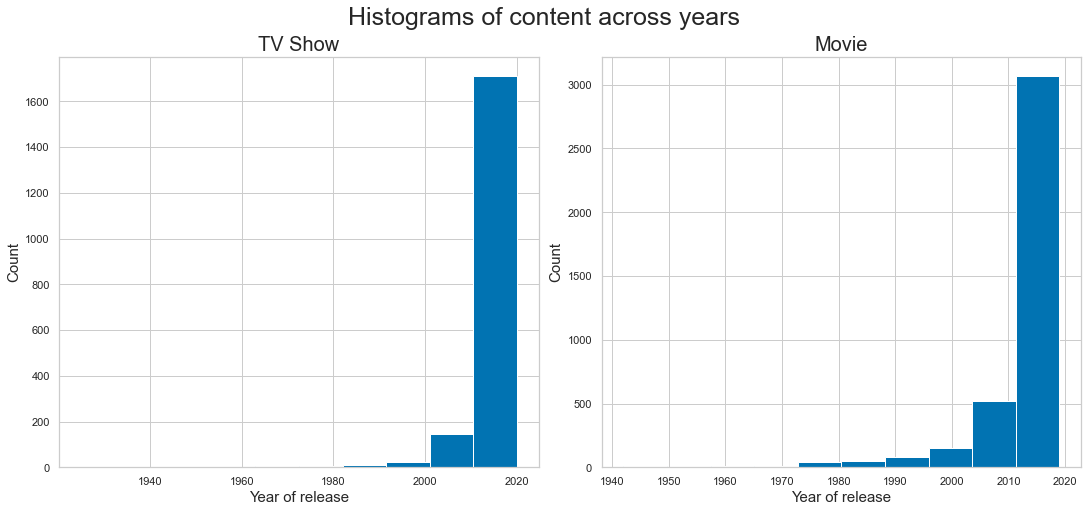

In [22]:
sns.set_theme(style="whitegrid", palette = "colorblind")
fig, axes = plt.subplots(1, 2, figsize=(15,7), constrained_layout = True)
fig.suptitle('Histograms of content across years', fontsize = 25)

ax1 = df[df['type'] == 'TV Show']['release_year'].plot(kind='hist', ax = axes[0])
ax1.set_xlabel("Year of release", fontsize = 15)
ax1.set_ylabel("Count", fontsize = 15)
ax1.set_title("TV Show", fontsize = 20)

ax2 = df[df['type'] == 'Movie']['release_year'].plot(kind='hist', ax = axes[1])
ax2.set_xlabel("Year of release", fontsize = 15)
ax2.set_ylabel("Count", fontsize = 15)
ax2.set_title("Movie", fontsize = 20)

plt.show()

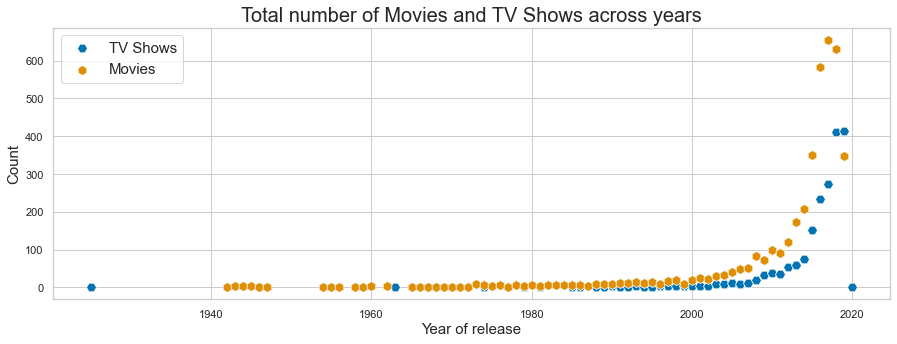

In [23]:
fig = plt.figure()
sns.set_theme(style="whitegrid", rc = {'figure.figsize':(15,5)})

ax1 = sns.scatterplot(data = data_tv, x = 'release_year', y = 'count', color = "#0173B2", label = 'TV Shows', s = 100, marker = 'H')
ax1.set_ylabel("Count", fontsize = 15)
ax1.set_xlabel("Year of release", fontsize = 15)
ax1.set_title("Total number of Movies and TV Shows across years", fontsize = 20)
ax2 = sns.scatterplot(data = data_movie, x = 'release_year', y = 'count', color = "#DE8F05", label = "Movies", s = 100, marker = 'h')

ax1.legend_.remove()
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes, fontsize = 15)
plt.show()

## How much of the content is formed by movies across years?

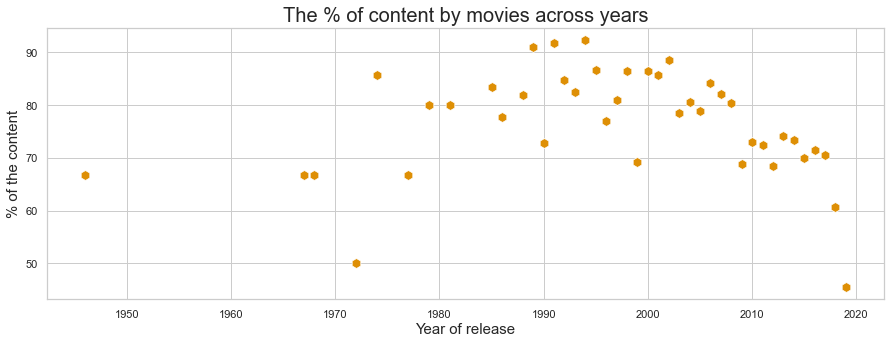

In [24]:
movie_prc = pd.merge(data_tv, data_movie, on = 'release_year', how = 'inner')
movie_prc['movie_prc'] = movie_prc['count_y']*100 / (movie_prc['count_y'] + movie_prc['count_x'])

sns.set_theme(style="whitegrid", rc = {'figure.figsize':(15,5)})

ax = sns.scatterplot(data = movie_prc, x = 'release_year', y = 'movie_prc', color = "#DE8F05", s = 100, marker = 'h')
ax.set_ylabel("% of the content", fontsize = 15)
ax.set_xlabel("Year of release", fontsize = 15)
ax.set_title("The % of content by movies across years", fontsize = 20)

plt.show()

## How did the rating distribution change in the last forty years?

In [25]:
for i in range(len(df)):
    df['decade'] = df['release_year'].apply(lambda x: (str(x)[:3]+ '0s'))
                                            
df[['release_year','decade']]

,release_year,decade
0,2019,2010s
1,2019,2010s
2,2019,2010s
3,2019,2010s
4,2019,2010s
...,...,...
5832,1987,1980s
5833,2009,2000s
5834,2007,2000s
5835,2007,2000s


In [26]:
small_df = df
small_df['decade'] = small_df['decade'].apply(lambda x: x if x in ["2010s", '2000s', '1990s', '1980s'] else 0)
small_df = small_df[small_df['decade'] != 0]
small_df_sorted = small_df.value_counts(["decade", "rating"]).to_frame(name="counts").sort_values("decade").reset_index()

small_df.value_counts(["decade"]).to_frame().sort_values("decade")

,0
decade,
1980s,70
1990s,150
2000s,532
2010s,5001


In [27]:
import numpy as np

conditions = [small_df_sorted['decade'] == '1980s',
              small_df_sorted['decade'] == '1990s',
              small_df_sorted['decade'] == '2000s']

outputs = [(100/70), (100/150), (100/532)]

result = np.select(conditions, outputs, (100/5001))
small_df_sorted['prc'] = pd.Series(result)*small_df_sorted['counts']
small_df_sorted

,decade,rating,counts,prc
0,1980s,G,1,1.428571
1,1980s,TV-14,15,21.428571
2,1980s,PG-13,2,2.857143
3,1980s,TV-Y7,2,2.857143
4,1980s,TV-PG,13,18.571429
5,1980s,TV-G,1,1.428571
6,1980s,NR,11,15.714286
7,1980s,PG,9,12.857143
8,1980s,TV-MA,7,10.000000
9,1980s,R,9,12.857143


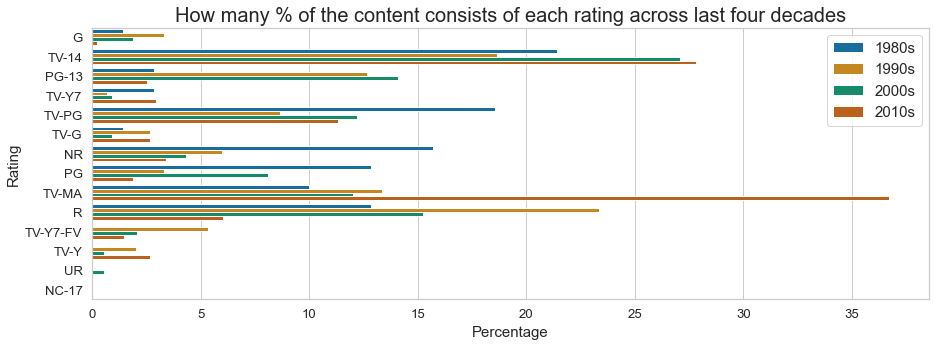

In [28]:
fig = plt.figure()

sns.set_theme(style="whitegrid", rc = {'figure.figsize':(25,15)}, palette = 'colorblind', font_scale = 1.2)
ax = sns.barplot(y="rating", x='prc', hue="decade", data=small_df_sorted)
ax.legend_.remove()
ax.set_title("How many % of the content consists of each rating across last four decades", fontsize = 20)
ax.set_xlabel("Percentage", fontsize = 15)
ax.set_ylabel("Rating", fontsize = 15)

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes, fontsize = 15)
plt.show()

## How much of the content is added to the database in each month?

In [29]:
df['date_added'] = df['date_added'].apply(lambda x: str(x).split(" ")[0])
df['date_added'].value_counts()

nan          642
October      580
November     544
March        504
August       454
December     424
September    420
July         413
April        406
January      389
May          380
February     342
June         339
Name: date_added, dtype: int64

In [30]:
sorter = ['January', "February", 'March', "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df['date_added'] = df['date_added'].astype("category")
df['date_added'].cat.set_categories(sorter, inplace=True)
df.sort_values(["date_added"], inplace=True)

C:\Users\marty\anaconda3\lib\site-packages\pandas\core\arrays\categorical.py:2747: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


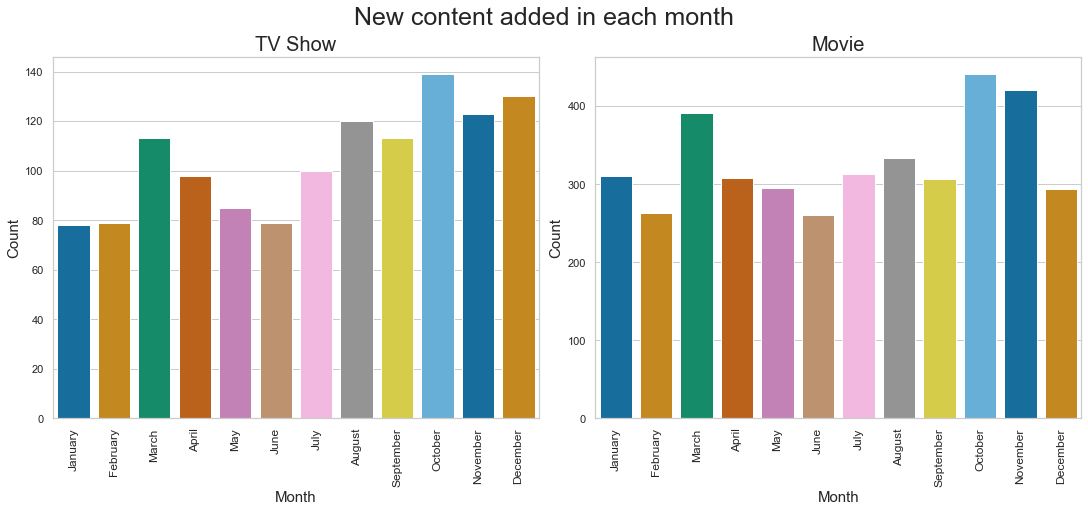

In [31]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(15,7), constrained_layout = True)
fig.suptitle('New content added in each month', fontsize = 25)

ax1 = sns.countplot(x='date_added', data=df[(df['type'] == 'TV Show') & (df['date_added'] != 'nan')], palette = 'colorblind', ax = axes[0])
ax1.set_xlabel("Month", fontsize = 15)
ax1.set_ylabel("Count", fontsize = 15)
ax1.set_title("TV Show", fontsize = 20)

ax2 = sns.countplot(x='date_added', data=df[(df['type'] == 'Movie') & (df['date_added'] != 'nan')], palette = 'colorblind', ax = axes[1])
ax2.set_xlabel("Month", fontsize = 15)
ax2.set_ylabel("Count", fontsize = 15)
ax2.set_title("Movie", fontsize = 20)

for ax in fig.axes:
    labels = ax.get_xticklabels()
    ax.set_xticklabels(fontsize=12, rotation=90, labels = labels)

plt.show()

# The first 10 rows of the dataset enriched by the IMDB ratings

In [63]:
df_imdb.head(10)

,index,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,averageRating,numVotes,decade
0,0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1,International TV Shows,Brought together by meaningful meals in the pa...,TV Show,7.6,1195.0,2010s
1,0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1,Korean TV Shows,Brought together by meaningful meals in the pa...,TV Show,7.6,1195.0,2010s
2,0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1,Romantic TV Shows,Brought together by meaningful meals in the pa...,TV Show,7.6,1195.0,2010s
3,1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,nan,"November 30, 2019",2019,TV-G,67,Documentaries,"From Sierra de las Minas to Esquipulas, explor...",Movie,6.6,222.0,2010s
4,1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,nan,"November 30, 2019",2019,TV-G,67,International Movies,"From Sierra de las Minas to Esquipulas, explor...",Movie,6.6,222.0,2010s
5,2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135,Comedies,A goofy copywriter unwittingly convinces the I...,Movie,4.3,2435.0,2010s
6,2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135,Dramas,A goofy copywriter unwittingly convinces the I...,Movie,4.3,2435.0,2010s
7,2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135,International Movies,A goofy copywriter unwittingly convinces the I...,Movie,4.3,2435.0,2010s
8,3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...",France,"November 29, 2019",2019,TV-14,106,Dramas,"Arranged to marry a rich man, young Ada is cru...",Movie,6.7,9366.0,2010s
9,3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...",France,"November 29, 2019",2019,TV-14,106,Independent Movies,"Arranged to marry a rich man, young Ada is cru...",Movie,6.7,9366.0,2010s


In [33]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3648 entries, 0 to 6035
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   show_id        3648 non-null   int64  
 1   title          3648 non-null   object 
 2   director       2853 non-null   object 
 3   cast           3293 non-null   object 
 4   country        3512 non-null   object 
 5   date_added     3576 non-null   object 
 6   release_year   3648 non-null   object 
 7   rating         3642 non-null   object 
 8   duration       3648 non-null   object 
 9   listed_in      3648 non-null   object 
 10  description    3648 non-null   object 
 11  type           3648 non-null   object 
 12  averageRating  3648 non-null   float64
 13  numVotes       3648 non-null   float64
dtypes: float64(2), int64(1), object(11)
memory usage: 427.5+ KB


In [34]:
df_imdb['release_year'] = df_imdb['release_year'].astype(int)

## Which is rated higher: tv show or movie? 

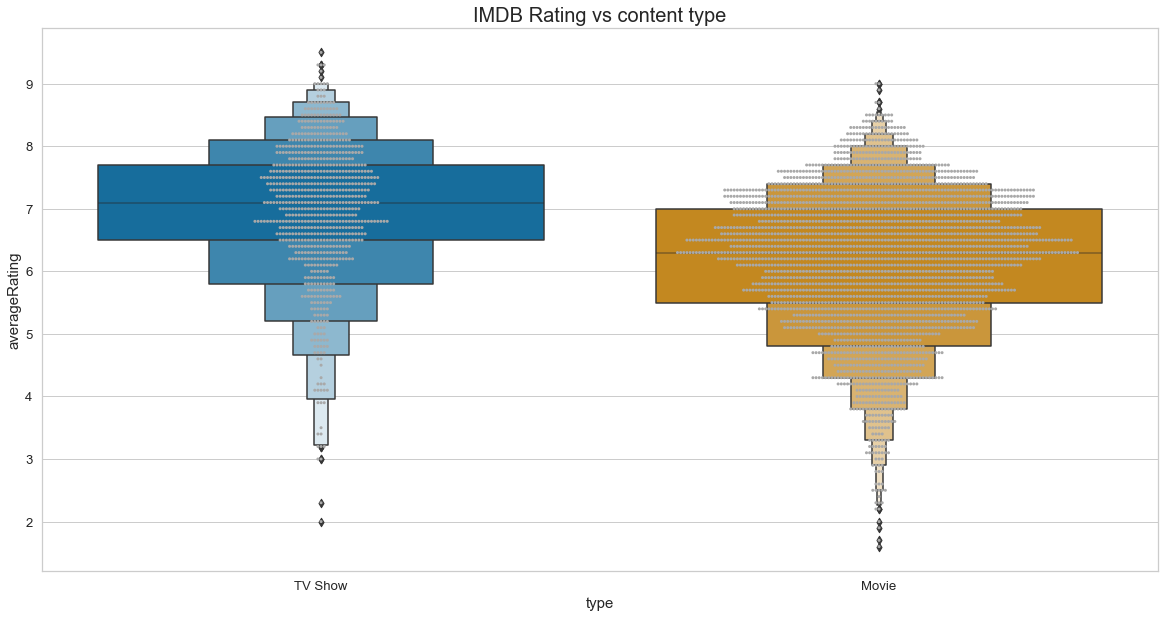

In [35]:
sns.set_theme(style="whitegrid", rc = {'figure.figsize':(20,10)}, palette = 'colorblind', font_scale = 1.2)
ax = sns.boxenplot(x='type', y = 'averageRating', data = df_imdb)
ax.set_title("IMDB Rating vs content type", fontsize = 20)
ax.set_xlabel("Type", fontsize= 15)
ax.set_ylabel("IMDB Rating", fontsize = 15)
sns.swarmplot(x='type', y = 'averageRating', data = df_imdb, size = 3, color = 'darkgrey')

plt.show()

## Did the content rating influence the IMDB rating across years?

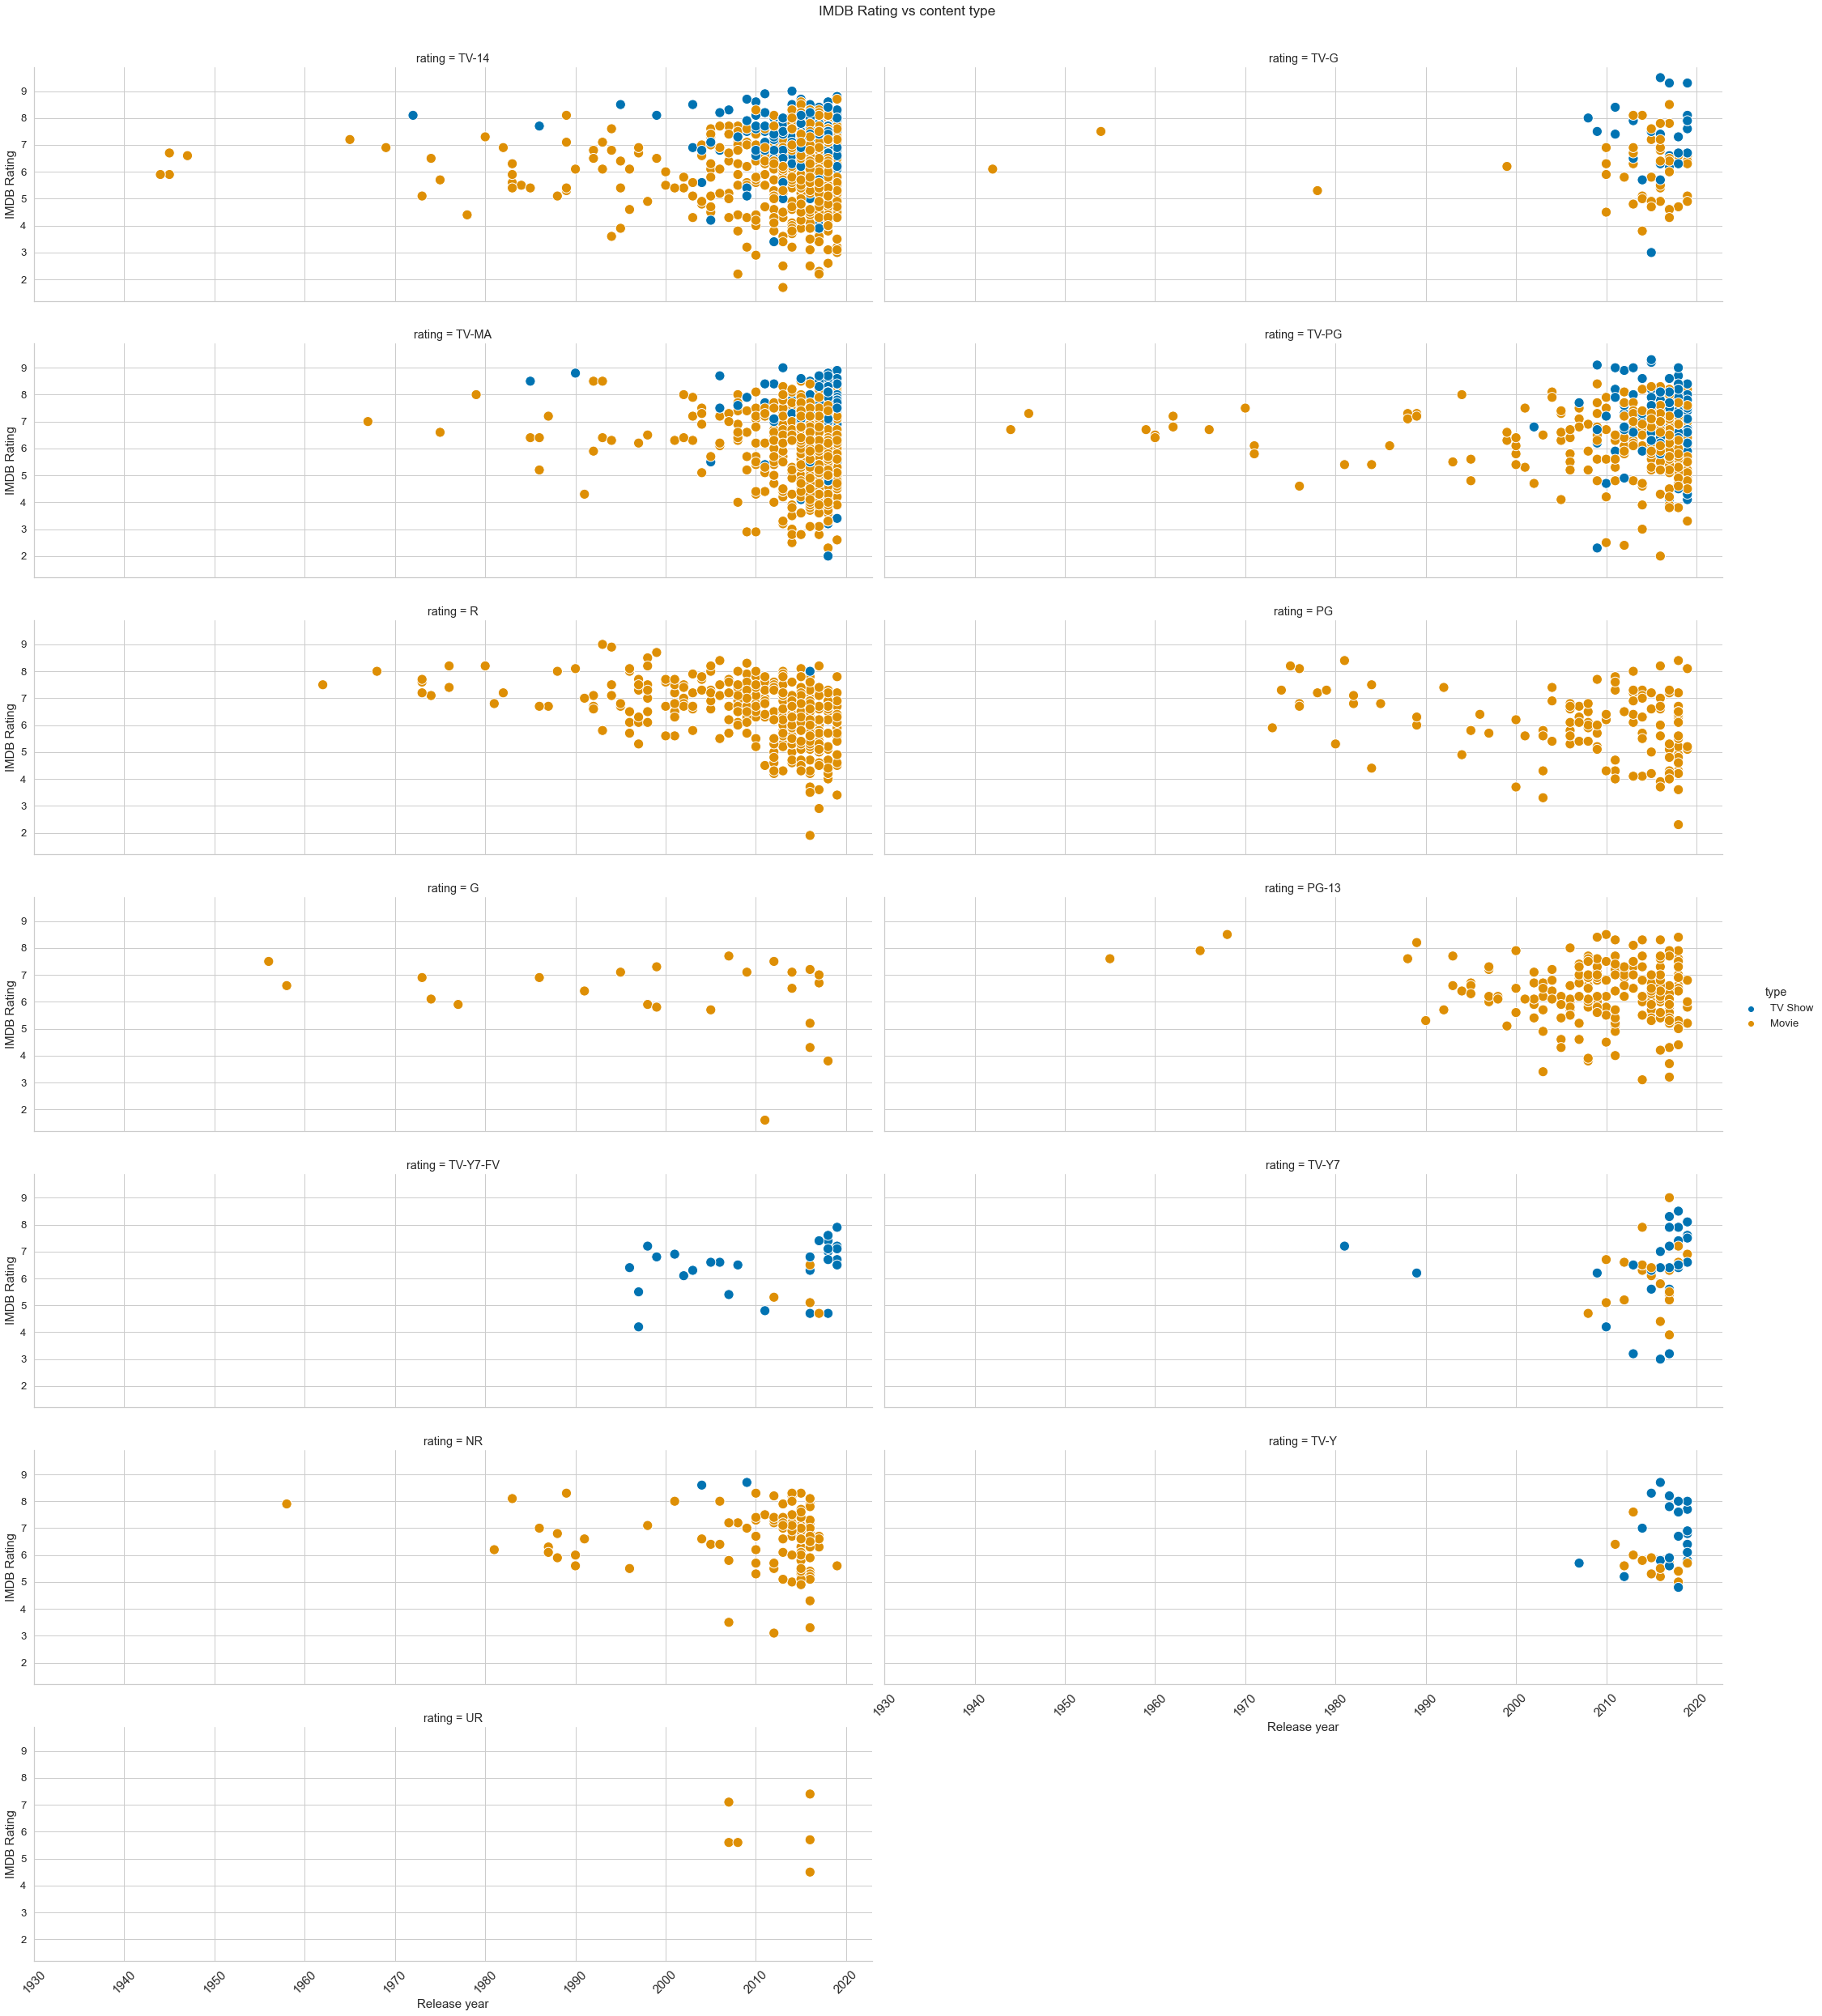

In [36]:
sns.set_theme(style="whitegrid", rc = {'figure.figsize':(20,20)}, palette = 'colorblind', font_scale = 1.2)

g = sns.relplot(x='release_year', y = 'averageRating', col = 'rating', col_wrap = 2, aspect = 3, s = 150, hue = 'type', data = df_imdb)
g.fig.suptitle("IMDB Rating vs content type")
g.fig.subplots_adjust(top = 0.95)
g.set_xlabels("Release year", fontsize= 15)
g.set_ylabels("IMDB Rating", fontsize = 15)

labels = range(1930,2021,10)
labels = [_ for _ in labels]

for ax in g.axes.flat:
    ax.set_xticks(range(1930,2021,10)) # set new labels
    ax.set_xticklabels(fontsize=15, rotation=45, labels = labels)
    
plt.show()

In [37]:
for i in range(len(df_imdb)):
    df_imdb['decade'] = df['release_year'].apply(lambda x: int(str(x)[:3]+ '0'))

In [38]:
df_imdb['country'].nunique()

408

In [39]:
df_imdb['listed_in'].nunique()

358

In [40]:
df_imdb = df_imdb.assign(country=df_imdb.country.str.split(',')).explode('country')
df_imdb['country'] = df_imdb['country'].apply(lambda x: str(x).strip())

In [41]:
df_imdb['country'].nunique()

105

In [42]:
df_imdb = df_imdb.assign(listed_in=df_imdb.listed_in.str.split(',')).explode('listed_in')
df_imdb['listed_in'] = df_imdb['listed_in'].apply(lambda x: str(x).strip())

In [43]:
df_imdb['listed_in'].nunique()

42

In [44]:
df_imdb.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,averageRating,numVotes,decade
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,International TV Shows,Brought together by meaningful meals in the pa...,TV Show,7.6,1195.0,2010.0
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,Korean TV Shows,Brought together by meaningful meals in the pa...,TV Show,7.6,1195.0,2010.0
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,Romantic TV Shows,Brought together by meaningful meals in the pa...,TV Show,7.6,1195.0,2010.0
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,nan,"November 30, 2019",2019,TV-G,67 min,Documentaries,"From Sierra de las Minas to Esquipulas, explor...",Movie,6.6,222.0,2010.0
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,nan,"November 30, 2019",2019,TV-G,67 min,International Movies,"From Sierra de las Minas to Esquipulas, explor...",Movie,6.6,222.0,2010.0


In [45]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10082 entries, 0 to 6035
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   show_id        10082 non-null  int64  
 1   title          10082 non-null  object 
 2   director       8018 non-null   object 
 3   cast           9247 non-null   object 
 4   country        10082 non-null  object 
 5   date_added     9914 non-null   object 
 6   release_year   10082 non-null  int32  
 7   rating         10074 non-null  object 
 8   duration       10082 non-null  object 
 9   listed_in      10082 non-null  object 
 10  description    10082 non-null  object 
 11  type           10082 non-null  object 
 12  averageRating  10082 non-null  float64
 13  numVotes       10082 non-null  float64
 14  decade         9737 non-null   float64
dtypes: float64(3), int32(1), int64(1), object(10)
memory usage: 1.2+ MB


## Is there a relation between year of release or the number of votes on the average IMDB rating?

In [46]:
df_imdb[['release_year', 'averageRating', 'numVotes', 'decade']].corr()

,release_year,averageRating,numVotes,decade
release_year,1.000000,-0.089470,-0.227683,0.111030
averageRating,-0.089470,1.000000,0.222591,-0.017866
numVotes,-0.227683,0.222591,1.000000,-0.018050
decade,0.111030,-0.017866,-0.018050,1.000000


<AxesSubplot:>

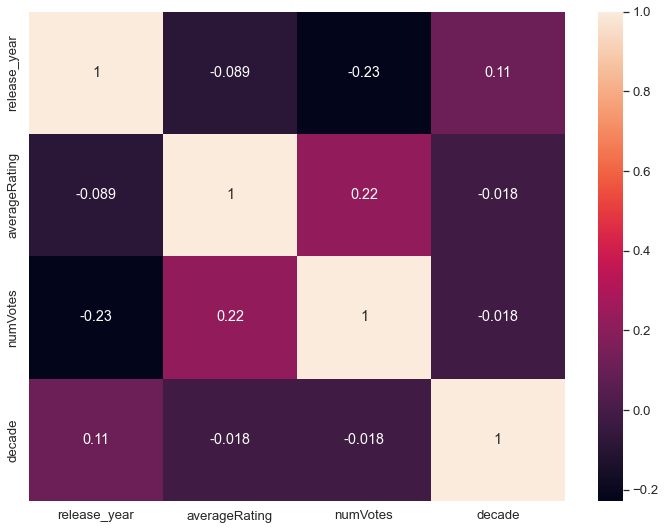

In [47]:
plt.figure(figsize=(12,9))
sns.heatmap(data = df_imdb[['release_year', 'averageRating', 'numVotes', 'decade']].corr(), annot=True)

In [48]:
df_imdb["duration"] = df_imdb["duration"].fillna("").apply(lambda x: x.split()[0])
df_imdb = df_imdb.reset_index()

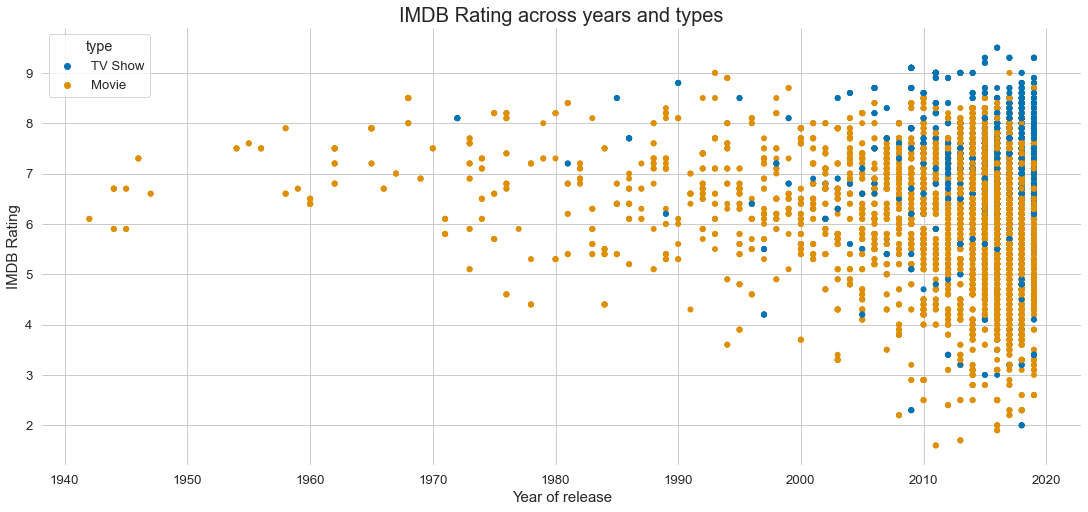

In [49]:
sns.set_theme(style="whitegrid", palette = 'colorblind', font_scale = 1.2)

fig, axes = plt.subplots(figsize=(15,7), constrained_layout = True)
sns.despine(fig, left=True, bottom=True)

axes = sns.scatterplot(x="release_year", y="averageRating", hue="type", sizes=(1, 8), linewidth=0, data=df_imdb)
axes.set_title("IMDB Rating across years and types", fontsize = 20)
axes.set_xlabel("Year of release", fontsize=15)
axes.set_ylabel("IMDB Rating", fontsize=15)

plt.show()

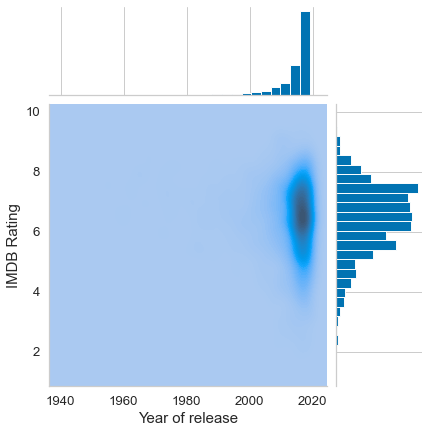

In [50]:
sns.set_theme(style="whitegrid", rc = {'figure.figsize':(15,15)}, palette = 'colorblind', font_scale = 1.2)

g = sns.JointGrid(ratio=3, space=0.1)
x, y = df_imdb["release_year"], df_imdb["averageRating"]
sns.kdeplot(x=x, y=y, fill=True, thresh=0, levels=50, ax = g.ax_joint)
sns.histplot(x=x, alpha=1, bins=25, ax=g.ax_marg_x)
sns.histplot(y=y, alpha=1, bins=25, ax=g.ax_marg_y)
g.set_axis_labels(xlabel="Year of release", ylabel="IMDB Rating", fontsize = 15)

plt.show()

In [51]:
for i in range(len(df_imdb)):
    df_imdb['decade'] = df['release_year'].apply(lambda x: (str(x)[:3]+ '0s'))

## Distribution of IMDB rating across decades and categories in movies

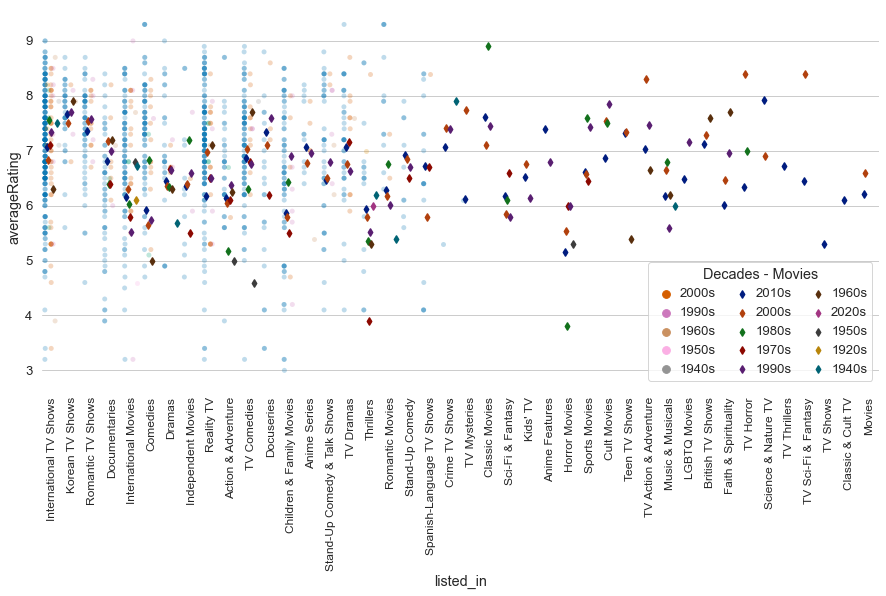

In [52]:
sns.set_theme(style="whitegrid", rc = {'figure.figsize':(15,7)}, palette = 'colorblind', font_scale = 1.2)

f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

sns.stripplot(x='listed_in', y='averageRating', data=df_imdb[df_imdb['type'] == 'TV Show'], hue = 'decade', dodge=True, alpha=.25, zorder=1)

sns.pointplot(x='listed_in', y='averageRating', hue="decade", data=df_imdb, dodge=.8 - .8 / 3,
              join=False, palette="dark", markers="d", scale=.75, ci=None)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="Decades - Movies", handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)

for ax in f.axes:
    labels = ax.get_xticklabels()
    ax.set_xticklabels(fontsize=12, rotation=90, labels = labels)

plt.show()

## Distribution of IMDB rating across decades and categories in TV shows

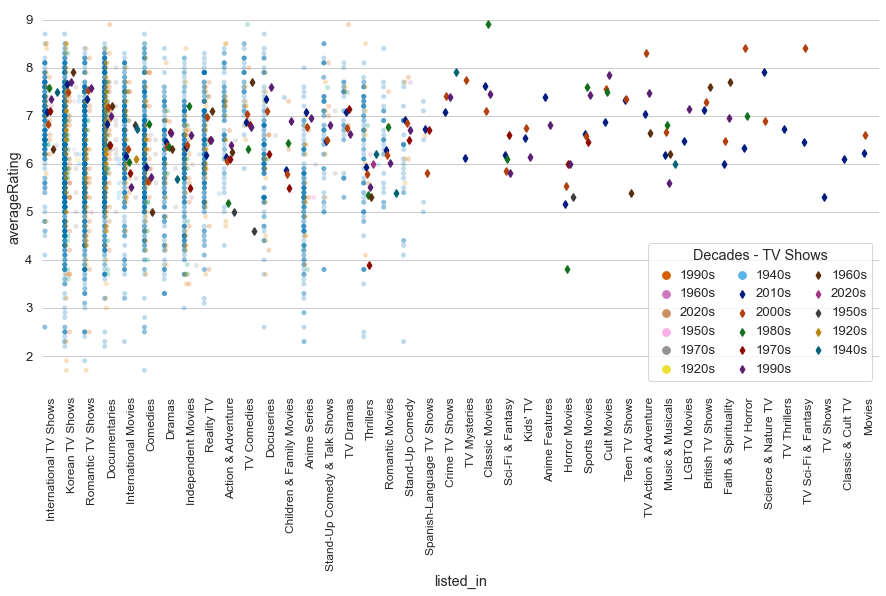

In [53]:
sns.set_theme(style="whitegrid", rc = {'figure.figsize':(15,7)}, palette = 'colorblind', font_scale = 1.2)

f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

sns.stripplot(x='listed_in', y='averageRating', data=df_imdb[df_imdb['type'] == 'Movie'], hue = 'decade', dodge=True, alpha=.25, zorder=1)

sns.pointplot(x='listed_in', y='averageRating', hue="decade", data=df_imdb, dodge=.8 - .8 / 3,
              join=False, palette="dark", markers="d", scale=.75, ci=None)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="Decades - TV Shows", handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)

for ax in f.axes:
    labels = ax.get_xticklabels()
    ax.set_xticklabels(fontsize=12, rotation=90, labels = labels)

plt.show()

## Which categories are the highest rated?

In [54]:
data_rating_tv = df_imdb[df_imdb['type'] == 'TV Show'].groupby('listed_in').agg({'averageRating' : ['median']})
data_rating_tv.reset_index(inplace=True)
data_rating_tv.columns = data_rating_tv.columns.to_flat_index()
data_rating_tv.sort_values(by=('averageRating', 'median'), inplace=True, ascending = False)

data_rating_movie = df_imdb[df_imdb['type'] == 'Movie'].groupby('listed_in').agg({'averageRating' : ['median']})
data_rating_movie.reset_index(inplace=True)
data_rating_movie.columns = data_rating_movie.columns.to_flat_index()
data_rating_movie.sort_values(by=('averageRating', 'median'), inplace=True, ascending = False)


In [55]:
data_rating_tv

,"(listed_in, )","(averageRating, median)"
7,Korean TV Shows,7.60
10,Science & Nature TV,7.60
1,British TV Shows,7.60
4,Docuseries,7.50
2,Classic & Cult TV,7.45
9,Romantic TV Shows,7.40
21,Teen TV Shows,7.30
13,TV Action & Adventure,7.20
5,International TV Shows,7.20
15,TV Dramas,7.20


In [56]:
data_rating_movie

,"(listed_in, )","(averageRating, median)"
3,Classic Movies,7.40
1,Anime Features,7.30
5,Cult Movies,7.10
17,Sports Movies,7.00
6,Documentaries,7.00
18,Stand-Up Comedy,6.80
13,Movies,6.80
7,Dramas,6.50
12,LGBTQ Movies,6.50
14,Music & Musicals,6.50


<Figure size 1080x504 with 0 Axes>

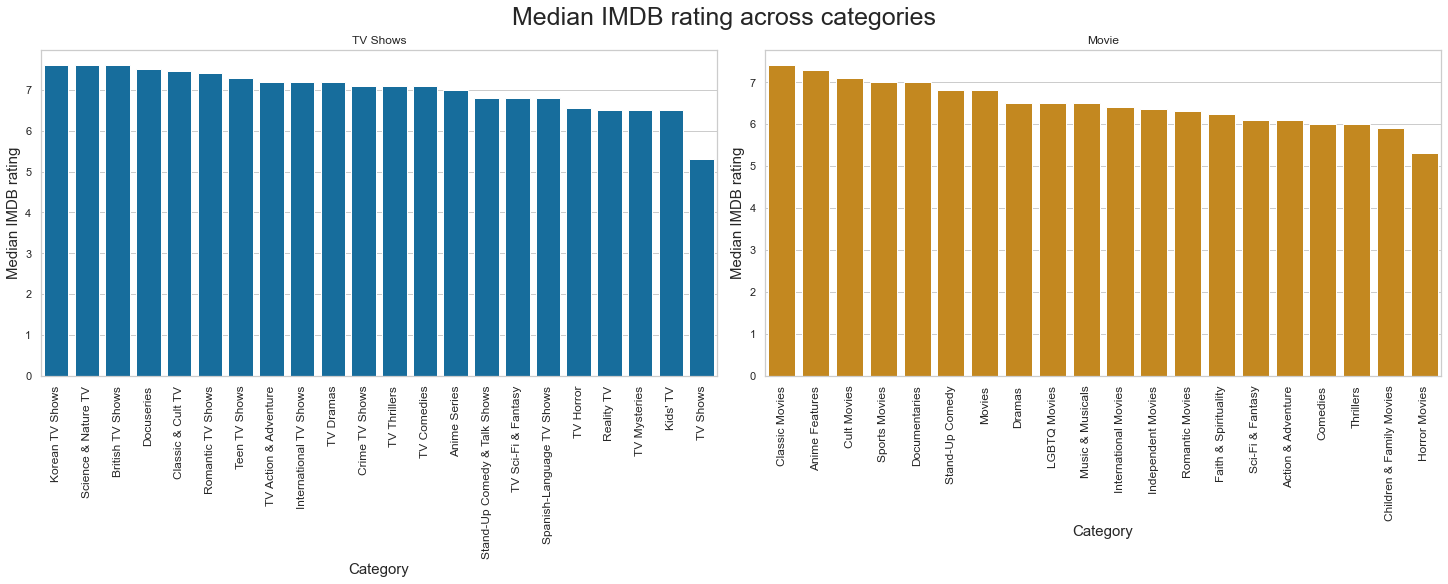

In [57]:
fig = plt.figure()
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(20,8), constrained_layout = True)
fig.suptitle('Median IMDB rating across categories', fontsize = 25)

ax1 = sns.barplot(data = data_rating_tv, x = ('listed_in', ''), y = ('averageRating', 'median'), color = "#0173B2", ax=axes[0])
ax1.set_ylabel("Median IMDB rating", fontsize = 15)
ax1.set_xlabel("Category", fontsize = 15)
ax1.set(title='TV Shows')

ax2 = sns.barplot(data = data_rating_movie, x = ('listed_in', ''), y = ('averageRating', 'median'), color = "#DE8F05", ax=axes[1])
ax2.set_ylabel("Median IMDB rating", fontsize = 15)
ax2.set_xlabel("Category", fontsize = 15)
ax2.set(title='Movie')

for ax in fig.axes:
    labels = ax.get_xticklabels()
    ax.set_xticklabels(fontsize=12, rotation=90, labels = labels)

plt.show()

## Which countries (from top 20 most numerous providers) produce the highest IMDB rated content?

In [58]:
data_rating_country = df_imdb.groupby('country').agg({'averageRating' : ['median','count']})
data_rating_country.reset_index(inplace=True)
data_rating_country.columns = data_rating_country.columns.to_flat_index()
data_rating_country.sort_values(by=('averageRating', 'count'), inplace=True, ascending = False)
data_rating_country = data_rating_country[data_rating_country[('country', '')] != 'nan'].iloc[:20,]
data_rating_country.sort_values(by=('averageRating', 'median'), inplace=True, ascending = False)

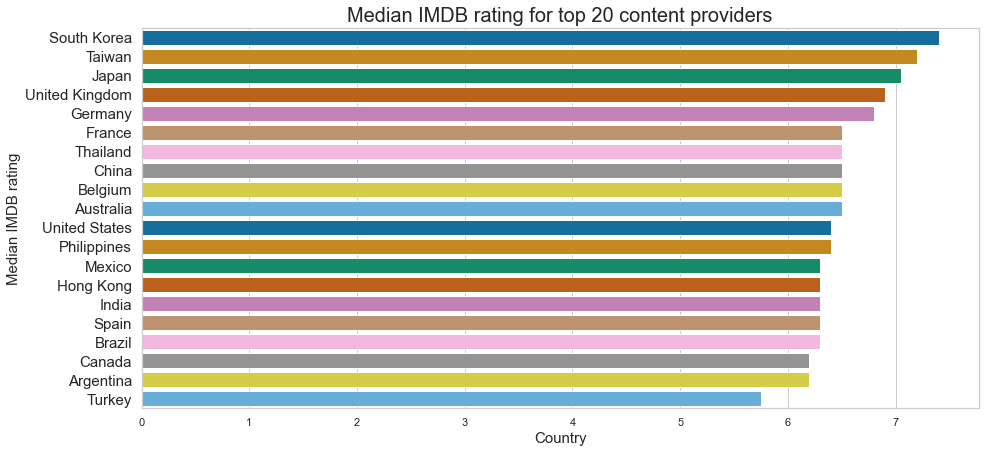

In [59]:
fig = plt.figure()
sns.set_theme(style="whitegrid")

g = sns.barplot(data = data_rating_country, y = ('country', ''), x = ('averageRating', 'median'), palette='colorblind')
g.set_ylabel("Median IMDB rating", fontsize = 15)
g.set_xlabel("Country", fontsize = 15)
g.set_title('Median IMDB rating for top 20 content providers', fontsize = 20)

labels = g.get_yticklabels()
g.set_yticklabels(fontsize=15, labels = labels)

plt.show()

# Wordcloud created from content description
### Based on solution provided by https://github.com/PlayingNumbers/ds_salary_proj

In [60]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

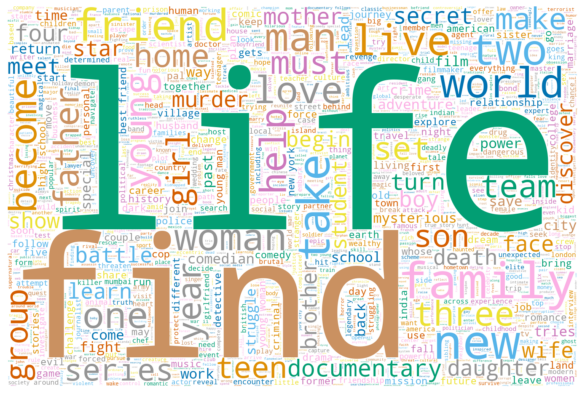

In [61]:
words = " ".join(df['description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)

from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("colorblind"))

text = " ".join([_ for _ in words_filtered])

wc = WordCloud(background_color = 'white', random_state = 2, max_words = 2000, width = 1500, height = 1000, colormap = cmap)
wc.generate(text)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

plt.show()
